# COGS 108 - Final Project 

# Overview

This project aims to investigate whether health inspections by a inspector new to the restaurant tend to report more number of violations than a repeat inspector in North Carolina. 

From the data analysis section, repeat inspectors tend to report 6-8% less violations than their previous inspections. New inspectors tend to still report 6% less critical violations, but 4% more non critical violations than previous inspections by different inspectors. Running t-test for the above samples gurantees the results does not happen randomly.

# Name & PID

- Name: Runchu Xu
- PID: A15437260

# Research Question

Do health inspections by a inspector new to the restaurant tend to report more number of violations than a repeat inspector in North Carolina?

## Background and Prior Work

According to Wong, "two thirds of reported foodborne outbreaks from 1998 through 2008 occurred in the restaurant or deli setting, and consumption of food prepared outside the home has been linked to an increased risk of sporadic foodborne diseases" (Wong, 2015). To reduce the possibility of foodborne diseases, it is important for inspectors to report as much violations as possible during health inspection processes. 

In "A Tale of Repetition: Lessons From Florida Restaurant Inspections", Ginger uses restaurant inspection data of Florida from 2003 to 2010 to suggests that inspectors tend to report 13-18% more violations in their first visit of a  restaurant than their second visit (Ginger, 2018). 

I want to investigate if the similar statement still holds true in North Carolina from 2012 to 2016, that health inspections a inspector new to the restaurant tend to report more number of violations than a repeat inspector. If so, more inspector ratation between restaurants and to prevent repeated inspections from a same inspector will allow inspectors to report more violations, thus improving the sanitary conditions of North Carolina restaurants and reduce the potential of foodborne diseases.

References (include links):
- 1) Ginger Zhe Jin & Jungmin Lee, 2018. "A Tale of Repetition: Lessons from Florida Restaurant Inspections," The Journal of Law and Economics, vol 61(1), pages 159-188. https://www.nber.org/papers/w20596
- 2) Wong, M. R., McKelvey, W., Ito, K., Schiff, C., Jacobson, J. B., & Kass, D. (2015). Impact of a letter-grade program on restaurant sanitary conditions and diner behavior in New York City. American journal of public health, 105(3), e81–e87. https://doi.org/10.2105/AJPH.2014.302404

# Hypothesis


Health inspections by a inspector new to the restaurant tend to report more number of violations than a repeat inspector in North Carolina.

There are two possible reasons according to Ginger. First, inspectors pay a higher level of attention during their first visit of a new restaurant. Second, the restaurant is able to know the inspector's preference of examination after his first inspection and therefore prepare accordingly, making less violations to be reported. (Ginger, 2018)


# Dataset(s)

- Dataset Name: inspections.csv
- Link to the dataset: inspections.csv (default directory of jupyter notebook)
- Number of observations: 18465

Inspections.csv includes part of the health inspection data of North Carolina restaurants from 2012 to 2016. 

Each observation contains the information of a reported inspection of a restaurant, including number of critical and non critical violations reported in this and previous inspection. 

Restaurants inspected by the same inspector in previous inspection is marked as "True" under the "previous_inspection_by_same_inspector" column. False otherwise. If the restaurant has never been inspected before, it's marked as NA.

Restaurant in each observation is in a random geographical location within North Carelina, which indicates they are randomly sampled. Therefore, they are suitable for t-test in the Data analysis section. Normality of the sample will be checked in data cleaning section.

# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import patsy
import scipy.stats as stats
from scipy.stats import ttest_ind

pd = pd.read_csv('inspections.csv')
pd.shape

(18466, 36)

# Data Cleaning

First, I drop all columns with unnecessary information. 

Then, I drop all rows with NA in "previous_inspection_by_same_inspector" column. If a observation is marked as NA, it means the restaurant has never been inspected before. Lack of experience and preparation for inspection is likely to become a confounding variable that increases number of violations reported. I only uses restaurants that have been inspected before.

After that, I divide df into two parts. 
pd_repeat includes inspection data of restaurants previously inspected by the same inspector.
pd_new includes inspection data of restaurants previously inspected by a different inspector.

The purpose of dividing df is to compare the effects of a repeat inspector with a new inspector when inspecting a restaurant.

In [25]:
pd = pd[['days_since_previous_inspection', 'previous_inspection_by_same_inspector', 'num_critical', 'num_non_critical', 'num_critical_previous', 'num_non_critical_previous']]

pd = pd.dropna()

pd_repeat = pd[pd['previous_inspection_by_same_inspector'] == True]
pd_new = pd[pd['previous_inspection_by_same_inspector'] == False]

Check the normality of difference in critical violations reported by repeat inspectors from their previous inspections.

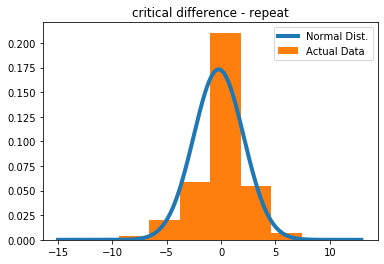

In [3]:
critical_repeat = pd_repeat['num_critical']
critical_repeat_pre = pd_repeat['num_critical_previous']
critical_repeat_diff = critical_repeat - critical_repeat_pre

xs = np.arange(critical_repeat_diff.min(), critical_repeat_diff.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(critical_repeat_diff), np.std(critical_repeat_diff))
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(critical_repeat_diff, density = True, label = 'Actual Data');
plt.title('critical difference - repeat')
plt.legend();

Check the normality of difference in non critical violations reported by repeat inspectors from their previous inspections.

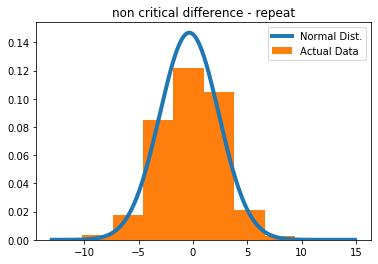

In [4]:
non_critical_repeat = pd_repeat['num_non_critical']
non_critical_repeat_pre = pd_repeat['num_non_critical_previous']
non_critical_repeat_diff = non_critical_repeat - non_critical_repeat_pre

xs = np.arange(non_critical_repeat_diff.min(), non_critical_repeat_diff.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(non_critical_repeat_diff), np.std(non_critical_repeat_diff))
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(non_critical_repeat_diff, density = True, label = 'Actual Data');
plt.title('non critical difference - repeat')
plt.legend();

Check the normality of difference in critical violations reported by inspectors new to the restaurant from previous inspections by a different inspector.

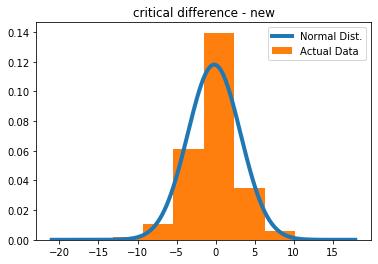

In [19]:
critical_new = pd_new['num_critical']
critical_new_pre = pd_new['num_critical_previous']
critical_new_diff = critical_new - critical_new_pre

xs = np.arange(critical_new_diff.min(), critical_new_diff.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(critical_new_diff), np.std(critical_new_diff))
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(critical_new_diff, density = True, label = 'Actual Data');
plt.title('critical difference - new')
plt.legend();

Check the normality of difference in non critical violations reported by inspectors new to the restaurant from previous inspections by a different inspector.

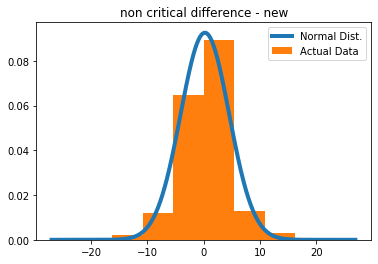

In [6]:
non_critical_new = pd_new['num_non_critical']
non_critical_new_pre = pd_new['num_non_critical_previous']
non_critical_new_diff = non_critical_new - non_critical_new_pre

xs = np.arange(non_critical_new_diff.min(), non_critical_new_diff.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(non_critical_new_diff), np.std(non_critical_new_diff))
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(non_critical_new_diff, density = True, label = 'Actual Data');
plt.title('non critical difference - new')
plt.legend();

All samples are normally distributed and can be used for t-test in the next section

# Data Analysis & Results

Find the probability that inspector new to the restaurant is assigned

In [7]:
pos_new = round(sum(pd['previous_inspection_by_same_inspector'] == False)/pd.shape[0],2)
print('possibility of new inspector: ' + str(pos_new))

possibility of new inspector: 0.36


Find the percentage difference in critical violations reported by repeat inspectors from their previous inspections.
<br>p0 = repeat inspectors report same number of critical violations as their previous inspection on average.
<br>p1 = repeat inspectors report different number of critical violations from their previous inspection on average.
<br>Run 1 sample t-test for p1 againest p0 (null hypothesis) and find p-value.
<br>p-value/2 is smaller than 0.01, reject p0 and keep p1.

In [31]:
print('mean of current critical violations: ' + str(round(critical_repeat.mean(), 2)))
print('mean of previous critical violations: ' + str(round(critical_repeat_pre.mean(), 2)))
print('mean of critical violations difference: ' + str(round(critical_repeat_diff.mean(), 2)))
print('percentage difference of violations: ' + str(round(critical_repeat_diff.mean()/critical_repeat_pre.mean(), 2)))
t_val, p_val = stats.ttest_1samp(critical_repeat_diff, 0)
print('p-value: ' + str(p_val))

mean of current critical violations: 2.67
mean of previous critical violations: 2.9
mean of critical violations difference: -0.22
percentage difference of violations: -0.08
p-value: 3.658987786926902e-22


Find the percentage difference in non critical violations reported by repeat inspectors from their previous inspections.
<br>p0 = repeat inspectors report same number of non critical violations as their previous inspection
<br>p1 = repeat inspectors report different number of non critical violations from their previous inspection
<br>Run 1 sample t-test for p1 againest p0 (null hypothesis) and find p-value.
<br>p-value is smaller than 0.01, reject p0 and keep p1.

In [33]:
print('mean of current non critical violations: ' + str(round(non_critical_repeat.mean(), 2)))
print('mean of previous non critical violations: ' + str(round(non_critical_repeat_pre.mean(), 2)))
print('mean of non critical violations difference: ' + str(round(non_critical_repeat_diff.mean(), 2)))
print('percentage difference of violations: ' + str(round(non_critical_repeat_diff.mean()/non_critical_repeat_pre.mean(), 2)))
t_val, p_val = stats.ttest_1samp(non_critical_repeat_diff, 0)
print('p-value: ' + str(p_val))

mean of current non critical violations: 4.88
mean of previous non critical violations: 5.21
mean of non critical violations difference: -0.34
percentage difference of violations: -0.06
p-value: 1.4517151501664154e-34


Find the percentage difference in critical violations reported by inspectors new to the restaurant from previous inspections by a different inspector.
<br>p0 = new inspectors report same number of critical violations as the previous inspection by a different inspector.
<br>p1 = new inspectors report different number of critical violations from the previous inspection by a different inspector.
<br>Run 1 sample t-test for p1 againest p0 (null hypothesis) and find p-value.
<br>p-value is smaller than 0.01, reject p0 and keep p1.

In [29]:
print('mean of current critical violations: ' + str(round(critical_new.mean(), 2)))
print('mean of previous critical violations: ' + str(round(critical_new_pre.mean(), 2)))
print('mean of critical violations difference: ' + str(round(critical_new_diff.mean(), 2)))
print('percentage difference of violations: ' + str(round(critical_new_diff.mean()/critical_new_pre.mean(), 2)))
t_val, p_val = stats.ttest_1samp(critical_new_diff, 0)
print('p-value: ' + str(p_val))

mean of current critical violations: 2.79
mean of previous critical violations: 2.97
mean of critical violations difference: -0.18
percentage difference of violations: -0.06
p-value: 9.137439533447575e-05


Find the percentage difference in non critical violations reported by inspectors new to the restaurant from previous inspections by a different inspector.
<br>p0 = new inspectors report same number of non critical violations as the previous inspection by a different inspector.
<br>p1 = new inspectors report different number of non critical violations from the previous inspection by a different inspector.
<br>Run 1 sample t-test for p1 againest p0 (null hypothesis) and find p-value.
<br>p-value is smaller than 0.01, reject p0 and keep p1.

In [21]:
print('mean of current non critical violations: ' + str(round(non_critical_new.mean(), 2)))
print('mean of previous non critical violations: ' + str(round(non_critical_new_pre.mean(), 2)))
print('mean of non critical violations difference: ' + str(round(non_critical_new_diff.mean(), 2)))
print('percentage difference of violations: ' + str(round(non_critical_new_diff.mean()/non_critical_new_pre.mean(), 2)))
t_val, p_val = stats.ttest_1samp(non_critical_new_diff, 0)
print('p-value: ' + str(p_val))

mean of current non critical violations: 5.54
mean of previous non critical violations: 5.34
mean of non critical violations difference: 0.21
percentage difference of violations: 0.04
p-value: 0.0003550834201928138


We can come to the following results:
1. Repeat inspectors tend to report 8% less critical violations, and 6% less non critical violations than their previous inspections. 
2. New inspectors tend to still report 6% less critical violations, but 4% more non critical violations than previous inspections by different inspectors.

After running two-tailed 1 sample t-tests, negligible p-value (3.7e-22 and 1.5e-34) suggests that it is unlikely that repeat inspectors report same number of violations as their previous inspection. Similarly, it is unlikely that a inspector new to the restaurant report same number of violations as the previous inspector. Therefore, it guarantees that the above results do not happen randomly. 

The 2nd conclusion indicates that lower number of violations reported is not solely due to the fact that the restaurant has improved its sanitary condition. I will discuss it more in the Conclusion&Discussion section.







# Ethics & Privacy

The dataset is given as part of the Cogs 108 final project, so I have the permission to use it.

In the data cleaning section, I droped all columns with private informations, including the name, address of the restaurants, the name of inspectors, and so on, so that they are not presented to the public. Since the data is completely anonymous, it is impossible that the data is used to harm anyone. 

There's no identification of which restaurant or inspector chooses to opt out of the use of their data, so I assume they all consent for their data to be used.

The conclusion of this project, that more inspector rotation should be applied in restaurant inspection process, is biased against inspectors. If the government want to prevent repeat inspection from a same inspector for each restaurant, inspectors have to rotate to restaurants in different region periodically. This might increase the communting time and the worklord of the inspectors.




# Conclusion & Discussion

Results from data analysis section:
1. Repeat inspectors tend to report 8% less critical violations, and 6% less non critical violations than their previous inspections.
2. New inspectors tend to still report 6% less critical violations, but 4% more non critical violations than previous inspections by different inspectors.

Look at the first conclusion, we don't know if the 6-8% less violations reported by the repeat inspectors is due to the fact that the restaurant has improved its sanitary condition. Due to lack of data, we cannot calculate the impact of such confounding variable. 

If we look at the second conclusion, we see that a inspector new to the restaurant report 6% less critical violations, 2% more than when inspected by a repeat inspector, which suggests that even if the sanitary condition has improved, new inspector is able to detect 2% more critical violations.

If we look at the number of non critical violations reported by a new inspector, is 10% (6+4) more than if inspected by a repeat one. It is clear that a new inspector is much more rigorous when detecting non critical violations. This is probably because the restaurant does not pay as much attention on non critical violations as critical ones, and the restaurant's sanitary conditon does not improve as much in terms of non critical aspects.

Therefore, we can cconclude that:
- Health inspections by a inspector new to the restaurant tend to report at least 2% more critical and 10% more non critical violations than a repeat inspector in North Carolin when the restaurant's sanitary conditions is unknown.

The government may consider making more rotations of inspectors between restaurants to encourage restaurants focus more on non critical aspects of the inspection checklist.

The dataset includes data of only North Carlina restaurants, so the conclusion of this project may not be applicate nationwide. Restaurant health inspection processes are different in every state such that the assumption that repeat inspector tend to report less violations than their previous inspections might not even hold true. Similarly, the dataset only includes inspections from 2012 to 2016, so the conclusion might not be applicable in 2020.

